# Preprocessing Data
The package <em>sklearn.preprocessing</em> provides several utility functions and classes to perform preprocessing on raw data. To have an overview of the package, we can visit [this page](https://scikit-learn.org/stable/modules/preprocessing.html).

# Dataset Standardization
In dataset stadarization, each individual feature of the dataset is transformed so that the distributions of all the features become more similar to one another.


## Mean Removal and Variance Scaling
In these kinds of preprocessing, each individual feature is centered to zero and/or scaled to have unit variance. More previcisely, a feature $x$ is transformed to $z$ such that
$$z = \frac{x-\mu}{\sigma}$$
where $\mu$ and $\sigma$ are the mean and standard deviation of $x$. Scikit-learn provides the class <em>sklearn.preprocessing.StandardScaler</em> for performing this transformation. The complete documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

### Sample code

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import numpy as np

In [2]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [3]:
scaler = StandardScaler(with_mean=True,
                        with_std=True)
scaler.fit(X_train)

StandardScaler()

In [4]:
print(scaler.mean_)
print(scaler.scale_)

[1.         0.         0.33333333]
[0.81649658 0.81649658 1.24721913]


In [5]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [6]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


### Example

In [7]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
scalar = StandardScaler()
scalar.fit(X_train, y_train)

StandardScaler()

In [10]:
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Scaling Features to a Range
In these kinds of prepocessing, each feature is scaled to lie between a maximum and minimum value. This can be achieved using [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) and [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler). MinMaxScaler transforms a feature $x$ as
$$z = \frac{x - x_{\text{min}}}{x_{\text{max}}-x_{\text{min}}}*(\text{max}-\text{min}) + \text{min}$$
where $x_{\text{min}}$ and $x_{\text{max}}$ are the minimum and maximum value of $x$.

MaxAbsScaler scales a feature $x$ as
$$z = x/|x|_{\text{max}}$$
where $|x|_{\text{max}}$ denotes the maximum value of $|x|$.

### Sample code for MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [13]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [14]:
print(min_max_scaler.scale_)
print(min_max_scaler.min_)

[0.5        0.5        0.33333333]
[0.         0.5        0.33333333]


### Sample code for MaxAbsScaler

In [15]:
from sklearn.preprocessing import MaxAbsScaler

In [16]:
X_train = np.array([[ 1., -1.,  2.],
                    [-2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [-1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [17]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [18]:
max_abs_scaler.scale_

array([2., 1., 2.])

# Normalization
In normalization, each sample is normalized to have unit variance. Scikit-learn provides the function [normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize) to perform normalization.

In [19]:
from sklearn.preprocessing import normalize

In [20]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = normalize(X,
                         norm='l1' # {‘l1’, ‘l2’, ‘max’}
                         )
X_normalized

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

# Scaling Features in the Presence of Outliers
Standarization methods like mean removal, variance scaling do work well in the presentation of outliers. Scikit-learn provides the class [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) to perform standardization robust to outliers. RobustScaler uses robust statistics like median to center and interquartile range to scale.

### Sample code

In [21]:
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
transformer = RobustScaler(with_centering=True,
                           with_scaling=True,
                           quantile_range=(25.0, 75.0)).fit(X)
transformer.transform(X)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

In [22]:
transformer.center_

array([1., 1., 2.])

In [23]:
transformer.scale_

array([3. , 1.5, 2.5])

# Nonlinear Transformation of Features
For many machine learning algorithm, it is desirable that the features are distributed in uniform or normal distribution. Scikit-learn implements several feature transformation methods which nonlinearly transform the features such that the transformed features follow uniform distribution or normal distribution.

## Box-Cox transform
Details can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer).

In [ ]:
sklearn.preprocessing.PowerTransformer(method='box-cox')

## Yeo-Johnson transformation
Details can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer).

In [ ]:
sklearn.preprocessing.PowerTransformer(method='yeo-johnson')

## Quantile Transformer
Details can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer).

In [ ]:
sklearn.preprocessing.QuantileTransformer(output_distribution='uniform') # output_distribution can be one of {‘uniform’, ‘normal’}

## Comparison of the three transformation
Original source: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

### Impporting the neccessary modules

In [24]:
# Author: Eric Chang <ericchang2017@u.northwestern.edu>
#         Nicolas Hug <contact@nicolas-hug.com>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

### Defining the transformations

In [25]:
rng = np.random.RandomState(304)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)

### Defining the distributions

In [27]:
N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30

size = (N_SAMPLES, 1)

# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

### Transforming the first three distributions

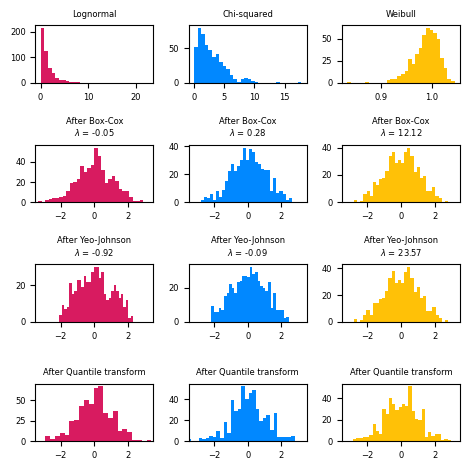

In [28]:
colors = ["#D81B60", "#0188FF", "#FFC107"]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=plt.figaspect(1))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions[:3], colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

### Transforming the last three distributions

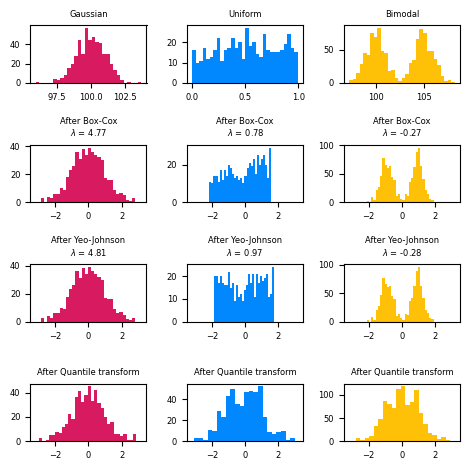

In [29]:
colors = ["#D81B60", "#0188FF", "#FFC107"]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=plt.figaspect(1))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions[3:], colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()